In [1]:
import PGFPlotsX: Axis, Plot, Plot3, TikzPicture, TikzDocument,
                  Table, Expression, Coordinates, @pgf
using LaTeXStrings

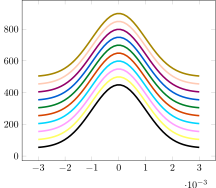

In [2]:
# Using a colorant as the line color
using Colors


μ = 0
σ = 1e-3

plots = []

@pgf for (i, col) in enumerate(distinguishable_colors(10))
    offset = i * 50
    p = Plot(Expression("exp(-(x-$μ)^2 / (2 * $σ^2)) / ($σ * sqrt(2*pi)) + $offset"),
    {
        color = col, 
        domain = "-3*$σ:3*$σ",
        style = { ultra_thick },
        samples = 50
    }; incremental = false)
        
    push!(plots, p)
end
Axis(plots)

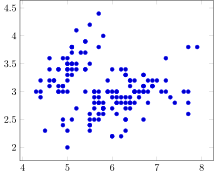

In [5]:
using DataFrames
using RDatasets
iris = @pgf Table(dataset("datasets", "iris"), {x = "SepalLength", y= "SepalWidth"})
a = @pgf Axis(Plot(iris, { only_marks }))

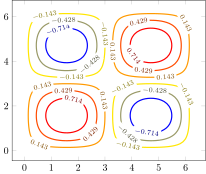

In [4]:
using Contour
xs = 0.0:0.1:2π
ys = 0.0:0.1:2π
X = [x for x in xs, y in ys]
Y = [x for x in xs, y in ys]
f = (x,y) -> sin(x)*sin(y)
@pgf p = Plot(Table(contours(X, Y, f.(X, Y'), 6)), { contour_prepared, very_thick }; incremental = false) 